## TRABAJO REGRESIÓN POLINÓMICA

### ESTUDIANTE: GORKY PALACIOS MUTIS

Dataset Seleccionado: [Car Data](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data?select=Car+details+v3.csv)

### IDENTIFICACIÓN DE VARIABLES

Variable dependiente (y): Selling_Price 

Variables independientes (X): Car_Name, Year,Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner

Para esta predicción y aplicación de Regresión Polinómica, usaremos la variable Present_Price


#### IMPORTAR LIBRERIAS

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


#### CARGAR EL DATASET

In [5]:
dataset = pd.read_csv('used_cars_data.csv') 
X = dataset[['Present_Price']].values  
y = dataset['Selling_Price'].values   

#### ENTRENAMIENTO DEL MODELO LINEAL

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

#### ENTRENAMIENTO DEL MODELO POLINÓMICO (GRADO 4)

In [9]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

#### VISUALIZACIÓN DE REGRESIÓN LINEAL

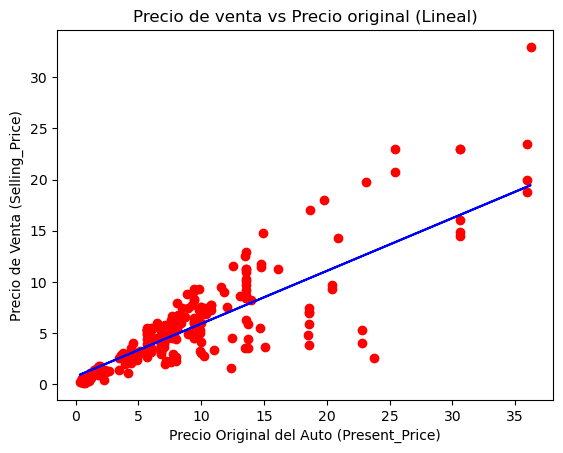

In [25]:
# Suponiendo que X tiene forma (n_samples, 1)
mask = X[:, 0] <= 40  # Creamos una máscara booleana con los valores de X
X_filtered = X[mask]
y_filtered = y[mask]

plt.scatter(X_filtered, y_filtered, color='red')
plt.plot(X_filtered, lin_reg.predict(X_filtered), color='blue')
plt.title('Precio de venta vs Precio original (Lineal)')
plt.xlabel('Precio Original del Auto (Present_Price)')
plt.ylabel('Precio de Venta (Selling_Price)')
plt.show()


#### VISUALIZACIÓN DE REGRESIÓN POLINÓMICA (CURVA MÁS SUAVE)

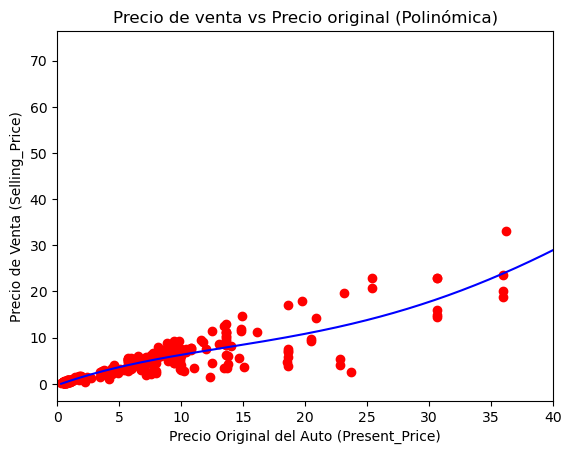

In [29]:
X_grid = np.arange(min(X[:, 0]), max(X[:, 0]), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.transform(X_grid)), color='blue')
plt.title('Precio de venta vs Precio original (Polinómica)')
plt.xlabel('Precio Original del Auto (Present_Price)')
plt.ylabel('Precio de Venta (Selling_Price)')
plt.xlim(0, 40) 
plt.show()

#### PREDICCIÓN DE NUEVOS RESULTADOS

In [15]:
precio_nuevo = 7.5  # por ejemplo, auto nuevo cuesta 7.5 lakhs
print("Lineal:", lin_reg.predict([[precio_nuevo]]))
print("Polinómica:", lin_reg_2.predict(poly_reg.transform([[precio_nuevo]])))

Lineal: [4.59489518]
Polinómica: [5.02899066]


MSE (Entrenamiento - Lineal): 5.51955317690238
MSE (Prueba - Lineal): 7.202032610310123
MSE (Entrenamiento - Polinómico): 4.198070019596756
MSE (Prueba - Polinómico): 6.7011534745250865


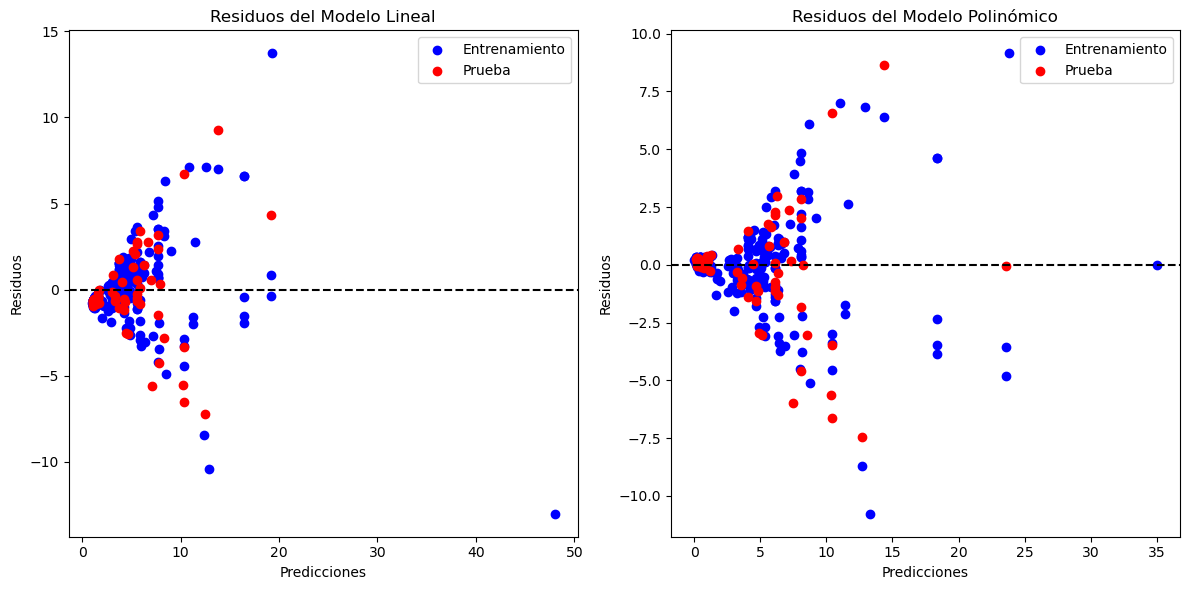

R² (Entrenamiento - Lineal): 0.7912190751012238
R² (Prueba - Lineal): 0.6873518619001651
R² (Entrenamiento - Polinómico): 0.8412050915372971
R² (Prueba - Polinómico): 0.7090955747781194


In [39]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos lineal y polinómico
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

poly_reg = PolynomialFeatures(degree=4)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

# Predicciones
y_pred_train_lin = lin_reg.predict(X_train)
y_pred_test_lin = lin_reg.predict(X_test)
y_pred_train_poly = lin_reg_2.predict(X_poly_train)
y_pred_test_poly = lin_reg_2.predict(X_poly_test)

# Calcular MSE para entrenamiento y prueba
mse_train_lin = mean_squared_error(y_train, y_pred_train_lin)
mse_test_lin = mean_squared_error(y_test, y_pred_test_lin)
mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)

# Imprimir resultados de MSE
print(f"MSE (Entrenamiento - Lineal): {mse_train_lin}")
print(f"MSE (Prueba - Lineal): {mse_test_lin}")
print(f"MSE (Entrenamiento - Polinómico): {mse_train_poly}")
print(f"MSE (Prueba - Polinómico): {mse_test_poly}")

# Gráficas de residuos
residuos_train_lin = y_train - y_pred_train_lin
residuos_test_lin = y_test - y_pred_test_lin
residuos_train_poly = y_train - y_pred_train_poly
residuos_test_poly = y_test - y_pred_test_poly

# Residuos - Lineal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_train_lin, residuos_train_lin, color='blue', label="Entrenamiento")
plt.scatter(y_pred_test_lin, residuos_test_lin, color='red', label="Prueba")
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuos del Modelo Lineal")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.legend()

# Residuos - Polinómico
plt.subplot(1, 2, 2)
plt.scatter(y_pred_train_poly, residuos_train_poly, color='blue', label="Entrenamiento")
plt.scatter(y_pred_test_poly, residuos_test_poly, color='red', label="Prueba")
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuos del Modelo Polinómico")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.legend()

plt.tight_layout()
plt.show()

# Comparación de R²
r2_train_lin = lin_reg.score(X_train, y_train)
r2_test_lin = lin_reg.score(X_test, y_test)
r2_train_poly = lin_reg_2.score(X_poly_train, y_train)
r2_test_poly = lin_reg_2.score(X_poly_test, y_test)

print(f"R² (Entrenamiento - Lineal): {r2_train_lin}")
print(f"R² (Prueba - Lineal): {r2_test_lin}")
print(f"R² (Entrenamiento - Polinómico): {r2_train_poly}")
print(f"R² (Prueba - Polinómico): {r2_test_poly}")


### CONCLUSIÓN / INTERPRETACIÓN

El modelo polinómico muestra un buen ajuste en los datos con los que fue entrenado, ya que explica el 84% de la variabilidad en los precios de los autos (R² de 0.84) y tiene un bajo error en las predicciones (MSE de 4.20). Sin embargo, cuando se prueba con datos nuevos (no vistos durante el entrenamiento), el rendimiento disminuye. El R² de prueba baja a 0.71 y el MSE de prueba aumenta a 6.70, lo que indica que el modelo tiene dificultades para generalizar y hacer predicciones precisas en datos no entrenados. Esto es una señal de sobreajuste: el modelo ha aprendido demasiado bien las características específicas de los datos de entrenamiento, pero no puede aplicarlas correctamente a datos nuevos. En resumen, aunque el modelo polinómico se ajusta muy bien a los datos de entrenamiento, no es tan confiable para predecir en situaciones del mundo real, ya que su capacidad de generalización es limitada.